# Heart Disease Dataset From UCI

Here, we will be using heart data from the UCI Machine Learning repository and we will build a support vector machine that can use this dataset to predict the presence of heart disease in a patient.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EDA

<AxesSubplot:xlabel='sex', ylabel='count'>

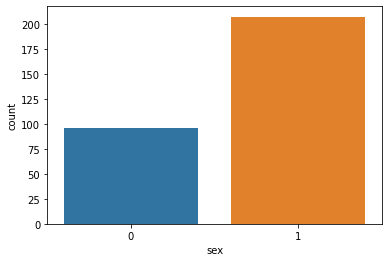

In [7]:
sns.countplot(x = 'sex', data = heart)
#There seems to be twice as many males than females in this dataset.

(array([ 2.,  3.,  7., 15., 20., 38., 32., 37., 37., 31., 22., 16., 19.,
        11.,  5.,  2.,  1.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([126. , 140.6, 155.2, 169.8, 184.4, 199. , 213.6, 228.2, 242.8,
        257.4, 272. , 286.6, 301.2, 315.8, 330.4, 345. , 359.6, 374.2,
        388.8, 403.4, 418. , 432.6, 447.2, 461.8, 476.4, 491. , 505.6,
        520.2, 534.8, 549.4, 564. ]),
 <BarContainer object of 30 artists>)

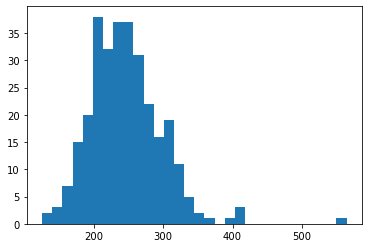

In [13]:
plt.hist('chol', bins = 30, data = heart)
#Serum cholesterol is more or less normally distribuuted so we can be hopeful of a simple random sample in the dataset.

<AxesSubplot:xlabel='fbs', ylabel='count'>

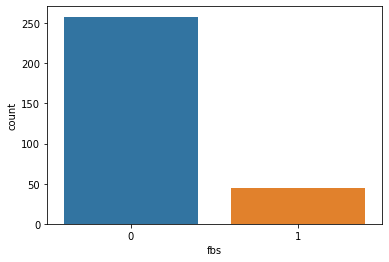

In [116]:
sns.countplot(x = 'fbs', data = heart)
#Majority of people have fasting blood sugar < 120 mg/DL.

<AxesSubplot:xlabel='age', ylabel='thalach'>

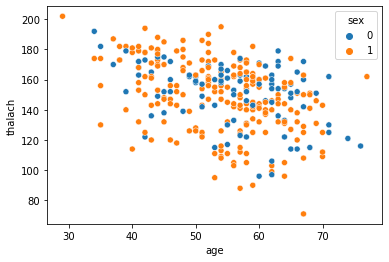

In [118]:
sns.scatterplot(x = 'age', y = 'thalach', hue = 'sex', data = heart)

In [123]:
print('Mean of male maximum heart rates: ', np.mean(heart[heart['sex'] == 1]['thalach']))
print('Mean of female maximum heart rates: ', np.mean(heart[heart['sex'] == 0]['thalach']))

Mean of male maximum heart rates:  148.96135265700482
Mean of female maximum heart rates:  151.125


**Females seem to have a higher average heart rate but we also need to keep in mind that these results may be skewed as there are twice as many male data points in the set.**

# Building the SVM Model

In [108]:
from sklearn.svm import SVC

In [109]:
svc = SVC()

**Time to split the training and testing data.**

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X = heart.drop(['target'], axis = 1)
y = heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [112]:
svc.fit(X_train, y_train)

SVC()

In [113]:
predictions = svc.predict(X_test)

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

In [115]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        42
           1       0.71      0.88      0.78        58

    accuracy                           0.72       100
   macro avg       0.73      0.69      0.69       100
weighted avg       0.73      0.72      0.71       100



[[21 21]
 [ 7 51]]


**Based on the context of the topic, we would probably want to reduce our false negatives, so let's do a grid search to manage lowering our false negatives, even though false positives may rise.**

# Using the Grid Search

In [89]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {'C': [1, 10, 100, 1000, 10000, 100000], 'gamma':[1,0.1, 0.01, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']}

In [101]:
grid = GridSearchCV(SVC(), param_grid, verbose = 3)

In [102]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.0

[CV 1/5] END ................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=10000, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=10000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=10000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=10000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=10000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=10000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=10000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [103]:
grid.best_params_

{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}

In [104]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.0

[CV 4/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=10000, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=10000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=10000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=10000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=10000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [105]:
predictions = grid.predict(X_test)

In [106]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.83      0.86      0.85        58

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



[[32 10]
 [ 8 50]]


**This seems to be the best model to use for this dataset as we only got 10 false negative cases and managed to retain high precision, recall, and f1-scores.**